In [7]:
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import tweepy
import json
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [8]:
# consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
# consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
# access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
# access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [9]:

# Use Tweepy to Authenticate our access# Use T 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
news_networks = ["@CNN","@FoxNews","@BBC","@NYT","@CBS"]

In [11]:
news = []
account =[]
date = []
text =[]
tweet_number=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for network in news_networks:
    public_tweets = api.search(network, count=100, result_type="recent")
    for tweet in public_tweets['statuses']:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        news.append(network)
        account.append(tweet['user']['name'])
        date.append(tweet['created_at'])
        text.append(tweet['text'])
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [13]:
#create the data frame
df = pd.DataFrame({
    "Network":news,
    "User":account,
    "Date":date,
    "Text":text,
    "Positive":positive_list,
    "Neutral":neutral_list,
    "Negative":negative_list,
    "Compound":compound_list,
})
df = df[['Network','User','Date','Text','Positive','Neutral','Negative','Compound']]
df.head()

,Network,User,Date,Text,Positive,Neutral,Negative,Compound
0,@CNN,❌Caspergirl #M_A_G_A_❌,Mon Sep 03 16:35:40 +0000 2018,@smalltownandrew I guess @cnn doesn't realize ...,0.000,0.797,0.203,-0.4215
1,@CNN,Customer Disservice,Mon Sep 03 16:35:39 +0000 2018,@CNN Do people really judge their food by how ...,0.000,1.000,0.000,0.0000
2,@CNN,Ruthy Bell 💙,Mon Sep 03 16:35:38 +0000 2018,RT @CNN: Heavy rain and strong wind are poundi...,0.125,0.792,0.083,0.2732
3,@CNN,Deborah,Mon Sep 03 16:35:37 +0000 2018,RT @CNN: Heavy rain and strong wind are poundi...,0.125,0.792,0.083,0.2732
4,@CNN,* * * 6️⃣2️⃣,Mon Sep 03 16:35:36 +0000 2018,RT @FeratOsmanoglu: #RaminHosseinPanahi'nin id...,0.000,1.000,0.000,0.0000


In [14]:
df.to_csv("Twitter_Sentiments.csv")
df = df.sort_values("Date")
df

,Network,User,Date,Text,Positive,Neutral,Negative,Compound
399,@NYT,Don Klyne,Mon Sep 03 02:29:50 +0000 2018,@KassandraSeven @NYT It’s such a shame that on...,0.208,0.618,0.174,0.1511
398,@NYT,Kevin Anton,Mon Sep 03 02:31:35 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954
397,@NYT,Michael,Mon Sep 03 02:31:42 +0000 2018,RT @99joemal: That report needs to hear from l...,0.090,0.910,0.000,0.2695
396,@NYT,Blue Wave Rising ❄️,Mon Sep 03 02:34:37 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954
395,@NYT,"Noname, Nobody",Mon Sep 03 02:37:04 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954
394,@NYT,Patrice C Collins,Mon Sep 03 02:38:13 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954
393,@NYT,M. D. B.,Mon Sep 03 02:39:35 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954
392,@NYT,(Marcy) Maurice Renfrow,Mon Sep 03 02:39:44 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954
391,@NYT,Carol Diaz,Mon Sep 03 02:43:19 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954
390,@NYT,Jason Cutter,Mon Sep 03 02:43:55 +0000 2018,RT @KassandraSeven: How Brett Kavanaugh Would ...,0.251,0.592,0.158,0.3954


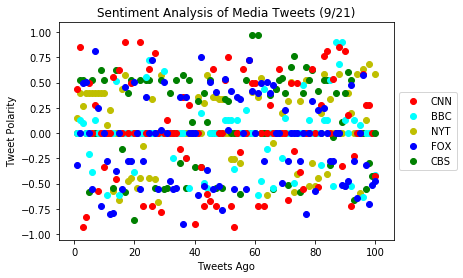

In [15]:
counter1=0
counter2=0
counter3=0
counter4=0
counter5=0

for index, row in df.iterrows():
    if (row["Network"]=="@CNN"):
        counter1 = counter1+1
        CNN = plt.scatter(counter1,row["Compound"],c ='r',marker="o")
    if (row["Network"]=="@NYT"):
        counter2 = counter2+1
        NYT = plt.scatter(counter2,row["Compound"],c ='y',marker="o")
    if (row["Network"]=="@FoxNews"):
        counter3 = counter3+1
        FOX = plt.scatter(counter3,row["Compound"],c ='b',marker="o")
    if (row["Network"]=="@BBC"):
        counter4 = counter4+1
        BBC = plt.scatter(counter4,row["Compound"],c ='cyan',marker="o")
    if (row["Network"]=="@CBS"):
        counter5 = counter5+1
        CBS = plt.scatter(counter5,row["Compound"],c ='g',marker="o")
        
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (9/21)")
plt.legend(handles = [CNN,BBC,NYT,FOX,CBS], labels = ["CNN","BBC","NYT","FOX","CBS"], loc='center left', bbox_to_anchor=(1, 0.5))

sns.set
plt.show()

In [16]:
new_df = pd.DataFrame(df.groupby("Network")["Compound"].mean())
new_df.head()

,Compound
Network,
@BBC,-0.010450
@CBS,0.108388
@CNN,0.029138
@FoxNews,-0.067424
@NYT,0.063427


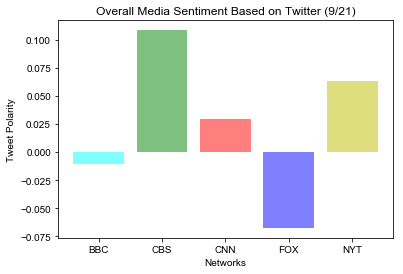

In [23]:
x_axis = np.arange(len(new_df["Compound"]))
compound_score = new_df["Compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha=0.5, align="edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (9/21)")
sns.set()
plt.show()

In [ ]:
#NOTES:
# Fox News is has the lowest sentiment score out of all news networks indicating that tweets 
# posted to their page carry negative sentiment more often than that of other news networks.
# CBS on the other hand has the highest sentiment scores indicating that tweets posted to 
# their page usually carry more positive sentiments.
# BBC seems to be near the neutral tweet zone with somewhat of a negative score
# All other news agencies hae a fairly high positive score.